In [1]:
import plotly.graph_objects as go

import time
import datetime
import sys
import numpy as np
from TimeTagger import Coincidences, Counter, Correlation, createTimeTagger, freeTimeTagger, Countrate, CoincidenceTimestamp, Coincidence
import matplotlib.pyplot as plt
from pylablib.devices import Thorlabs

# 1) init stage

stage = Thorlabs.KinesisMotor("83855348")
# stage.home()
# stage.wait_for_stop()

In [5]:
stage.home()
stage.wait_for_stop()

# -14077 < x < 881664
# -0.407 < x < 25.515

In [12]:
stage.move_to(0)
stage.wait_for_stop()

In [13]:
stage.get_position()

0

# Global Scan

In [29]:
# 2) init tagger

tagger = createTimeTagger()
for j in range(1, 17):
    tagger.setTriggerLevel(j, 1.0)

tagger.setInputDelay(2, -3750)
tagger.setInputDelay(3, -4775)
tagger.setInputDelay(4, -10335)
tagger.setInputDelay(5, -10900)

coin = Coincidence(
                tagger, [1, 2, 3, 4], coincidenceWindow=3000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=coin.getChannels())

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_vis/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.02
sec = 60
counts = []

center = 350000 # 118870
ran = round(0.12 * 34555)
range_max = center + ran
range_min = center - ran

# range_max = 881664
# range_min = -14077

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try:
    for pos in range(range_min, range_max, int(step*34555)):
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("\n")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()[0]
        print("counts: ", count)
        pos_count = [cur_pos] + [count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
except Exception as e:
    raise e
finally:
    f.close()
    freeTimeTagger(tagger=tagger)
    print("Finished!")

Start time : 25.04.24_19.29.49
Estimated time :  12 min
Estimated finish time : 25.04.24_19.41.49
Moving to position 10.009 mm...
Current position: 10.009 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  129
Moving to position 10.029 mm...
Current position: 10.029 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  155
Moving to position 10.049 mm...
Current position: 10.049 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  135
Moving to position 10.069 mm...
Current position: 10.069 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  139
Moving to position 10.089 mm...
Current position: 10.089 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  163
Moving to position 10.109 mm...
Current position: 10.109 mm
Performing coincidence counting...
Time remaining:    1 s

counts:  155
Moving to position 10.129 mm...
Current position: 10.129 mm
Performing coincidence counting...
Time remaining:

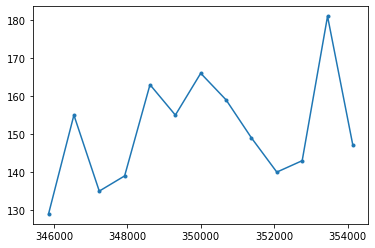

In [30]:
x = np.arange(range_min, range_max, int(step*34555))
plt.plot(x, counts, ".-")
# plt.savefig(filename[:-4] + '.jpg')
plt.show()

In [27]:
# y = np.array([e[0] for e in counts])
f = go.Figure()
f.add_trace(go.Scatter(x=x/34555, y=counts, mode='markers+lines'))
f.show()

# Local Scan

Start time : 25.04.25_19.12.43
Estimated time :  4 min
Estimated finish time : 25.04.25_19.17.10


Moving to position 9.929 mm...
Current position: 9.929 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [192]


Moving to position 9.944 mm...
Current position: 9.944 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [160]


Moving to position 9.959 mm...
Current position: 9.959 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [198]


Moving to position 9.974 mm...
Current position: 9.974 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [171]


Moving to position 9.989 mm...
Current position: 9.989 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [187]


Moving to position 10.004 mm...
Current position: 10.004 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [208]


Moving to position 10.019 mm...
Current position: 10.019 mm
Performing coincidence counting...
Time r

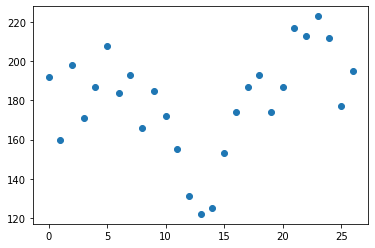

In [40]:
# 2) init tagger

tagger = createTimeTagger()
for j in range(1, 17):
    tagger.setTriggerLevel(j, 1.0)

tagger.setInputDelay(2, -3750)
tagger.setInputDelay(3, -4775)
tagger.setInputDelay(4, -10335)
tagger.setInputDelay(5, -10900)

coin = Coincidence(
                tagger, [1, 2, 4, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=coin.getChannels())

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.015
sec = 10
counts = []

center = 350000 # 118870
ran = round(0.2 * 34555)
range_max = center + ran
range_min = center - ran

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try: 
    for pos in range(range_min, range_max, int(step*34555)):
        print("\n======================================\n")
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [cur_pos] + [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
finally:
    f.close()
    freeTimeTagger(tagger=tagger)
    print("Finished!")


plt.plot(counts, "o")
plt.savefig(filename[:-4] + '.jpg')
plt.show()

# DDDD DDDA Together

Start time : 25.04.25_19.52.20
Estimated time :  800 min
Estimated finish time : 25.04.26_09.12.24


Moving to position 10.009 mm...
Current position: 10.009 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [303 387]


Moving to position 10.019 mm...
Current position: 10.019 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [372 393]


Moving to position 10.029 mm...
Current position: 10.029 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [364 378]


Moving to position 10.039 mm...
Current position: 10.039 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [387 383]


Moving to position 10.049 mm...
Current position: 10.049 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [381 316]


Moving to position 10.059 mm...
Current position: 10.059 mm
Performing coincidence counting...
Time remaining:    1 s
counts:  [365 397]


Moving to position 10.069 mm...
Current position: 10.069 mm
Perfo

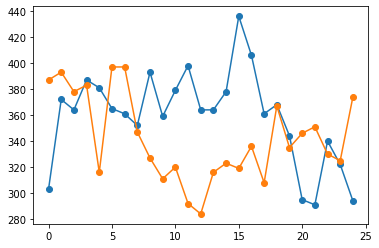

In [43]:
# 2) init tagger

tagger = createTimeTagger()
for j in range(1, 17):
    tagger.setTriggerLevel(j, 1.0)

tagger.setInputDelay(2, -3750)
tagger.setInputDelay(3, -4775)
tagger.setInputDelay(4, -10335)
tagger.setInputDelay(5, -10900)

coin_DDDD = Coincidence(
                tagger, [1, 2, 3, 4], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

coin_DDDA = Coincidence(
                tagger, [1, 2, 3, 5], coincidenceWindow=5000, timestamp=CoincidenceTimestamp.Average
                )

countrate = Countrate(tagger=tagger, channels=[coin_DDDD.getChannel(), coin_DDDA.getChannel()])

# 3) measure

t = datetime.datetime.now()
start_time = t.strftime("%y.%m.%d_%H.%M.%S")
filename = f"data_Haifei/vis_{start_time}.txt"
f = open(filename, "w")

step = 0.01
sec = 2000 # 600
counts = []

center = 350000 # 118870
ran = round(0.12 * 34555)
range_max = center + ran
range_min = center - ran

estimated_time = ( sec * (range_max - range_min) / (step * 34555) ) / 60

estimated_finish_time = (t + datetime.timedelta(minutes=estimated_time)).strftime("%y.%m.%d_%H.%M.%S")

print(f"Start time : {start_time}")
print(f"Estimated time : {estimated_time : .0f} min")
print(f"Estimated finish time : {estimated_finish_time}")

try: 
    for pos in range(range_min, range_max, int(step*34555)):
        print("\n======================================\n")
        print(f"Moving to position {pos/34555:.3f} mm...")
        stage.move_to(pos)
        stage.wait_for_stop()
        cur_pos = stage.get_position()
        print(f"Current position: {cur_pos/34555:.3f} mm")
        print("Performing coincidence counting...")
        countrate.startFor(int(sec*1e12))
        for i in range(0, sec):
            sys.stdout.write("\r")
            sys.stdout.write(f"Time remaining: {(sec - i):4d} s")
            sys.stdout.flush()
            time.sleep(1)
        print("")
        countrate.waitUntilFinished()
        count = countrate.getCountsTotal()
        print("counts: ", count)
        pos_count = [cur_pos] + [int(num) for num in count]
        counts.append(count)

        f.write(" ".join(map(str, pos_count)))
        f.write("\n")
        f.flush()
finally:
    f.close()
    freeTimeTagger(tagger=tagger)
    print("Finished")


plt.plot(counts, "-o")
plt.savefig(filename[:-4] + '.jpg')
plt.show()

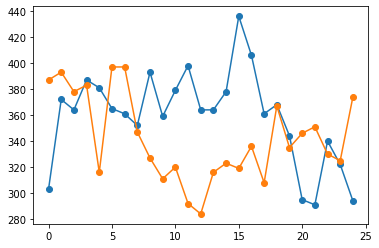

In [45]:
plt.plot(counts, "-o")
plt.show()